<img src="https://2.bp.blogspot.com/-066qpJs0Ttc/WiYPXGNYEYI/AAAAAAAAFu8/XbOaf7DqfDMM9truu3DkrkIGfRgP4zBzgCLcBGAs/s1600/udinus.jpg"  width="200">

# Workshop Associate Data Scientist - Juni 2024


Nama:

Nim:

Nama Asesor:


PANDUAN:
- **SILAKAN PERBAIKI YANG BERTANDA FIX_ME**
- JIKA TIDAK ADA FIX_ME, ANDA TIDAK PERLU MERUBAH CODING DI CELL TERSEBUT
- JALANKAN CELL SATU PERSATU

## Latar Belakang Masalah
Kesehatan adalah hal yang berharga. Maka kebutuhan akan akses Kesehatan adalah mutlak diperlukan untuk menjamin keberlangsungan dan kesejahteraan masyarakat. Di masyarakat, ada beberapa penyakit yang berimbas luar biasa kepada penderita, salah satunya adalah penyakit Hepatitis.

Penyakit hepatitis jika tidak ditangani dengan segera dapat menyebabkan kematian. Oleh karena itu, Pemerintah berupaya menekan angka kematian penderita Hepatitis dengan berbagai cara, salah satunya adalah dengan melakukan klasifikasi dan prediksi penyakit Hepatitis. Data-data pasien dan kondisi Kesehatan pasien mulai digencarkan untuk direkam oleh Pemerintah, kemudian dataset itu digunakan menjadi bahan untuk model prediksi yang bisa membantu memprediksi dan mengklasifikasi Kesehatan pasien hepatitis.

Diantara alternatif solusi yang dikembangkan adalah metode Data Science yang menerapkan sebuah framework yang telah dipergunakan secara luas di dunia industri yaitu CRISP-DM framework. Framework ini selanjutnya diuraikan menjadi sebuah 11 urutan langkah2 antara lain: memahami tujuan bisnis, memahami tujuan teknis data science, memahami dan melakukan proses awal data, membuat skenario pemodelan, membuat model yang handal, mengevaluasi pemodelan, dan mereview proyek data science. Solusi tersebut digunakan untuk mengidentifikasi factor-faktor yang berkontribusi terhadap Kesehatan pasien hepatitis. Hasil prediksi tersebut selanjutnya digunakan oleh pasien dan pemerintah dalam meningkatkan harapan hidup pasien hepatitis.

Sumber data utama untuk keperluan pengembangan model prediktif ini adalah hasil survey menggunakan kuisioner terhadap pasien rumah sakit sebagai responden menggunakan Teknik proporsional random sampling. Pengumpulan data melalui data rekam medis menghasilkan data berisi atribut: **`age, sex, steroid, antiviral, fatigue, malaise, anorexia, liver big, liver firm, spleen palpable, spiders, ascites, varices, bilirubin, alk phosphate, sgot, albumin, protime, histology`**.

Disini, **Class (DIE atau LIVE) merupakan variable dependent nya (label yang dicari)**.

## Tujuan Ujian Sertifikasi
Tujuan pemanfaatan metode Data Science yang utama didalam kasus ini adalah menghasilkan model prediktif yang akurat yang dapat dipergunakan untuk:
- mengidentifikasi variabel kunci yang mempengaruhi harapan hidup pasien hepatitis,
- dan memprediksi harapan hidup pasien hidup pasien hepatitis.

Dari hasil pemodelan prediktif dengan Data Science diharapkan dapat memberikan masukan kepada pihak rumah sakit dan Pemerintah untuk mengatasi salah satu masalah penting dibidang kesehatan tersebut.

## Terkait Dataset
Sumber data: https://archive.ics.uci.edu/ml/datasets/Hepatitis  
Jumlah Sampel Data: 155 records dengan 19 atributes

**Atribut untuk memprediksi harapan hidup pasien hepatitis**:

AGE: 10, 20, 30, 40, 50, 60, 70, 80

SEX: male, female

STEROID: no, yes

ANTIVIRALS: no, yes

FATIGUE: no, yes

MALAISE: no, yes

ANOREXIA: no, yes

LIVER BIG: no, yes

LIVER FIRM: no, yes

SPLEEN PALPABLE: no, yes

SPIDERS: no, yes

ASCITES: no, yes

VARICES: no, yes

BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00

ALK PHOSPHATE: 33, 80, 120, 160, 200, 250

SGOT: 13, 100, 200, 300, 400, 500,

ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0

PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90

HISTOLOGY: no, yes

**Fitur target**:

Class: DIE, LIVE


## Load Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data

In [3]:
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data', header=None)

In [4]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


### memasukkan nama fitur kedalam dataset

In [5]:
dataset.columns=["Class","Age","Sex","Steroid","Antivirals","Fatigue","Malaise","Anorexia","Liver Big",
                 "Liver Firm","Spleen Palpable","Spiders","Ascites","Varices","Bilirubin","Alk Phosphate","SGOT","Albumin","Protime","Histology"]

In [6]:
dataset.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


## BAB 2 – (J.62DMI00.005.1) Menelaah data



### analisis karakteristik data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  SGOT             155 non-null    object
 17  Albumin          155 non-null    ob

**temuan**: ada beberapa bernilai int64, namun ada yang bernilai Object

### cek deskripsi data

In [8]:
dataset.describe()

,Class,Age,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.845161,1.451613
std,0.406070,12.565878,0.305240,0.362923,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [9]:
dataset.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [10]:
dataset.tail()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


**temuan**: dari head dan tail, kita lihat semua berbentuk angka, namun ada yang bernilai `?`, ini yang menyebabkan tipe data menjadi `Object`, maka diperlukan proses untuk merubah `?` menjadi bisa digunakan

### cek distribusi Class

In [11]:
dataset['Class'].value_counts()

Class
2    123
1     32
Name: count, dtype: int64

disini class 1 berarti meninggal (DIE) dan 2 adalah Live

**temuan**: [distribusi class tidak seimbang, karena perbandingan 1:4]

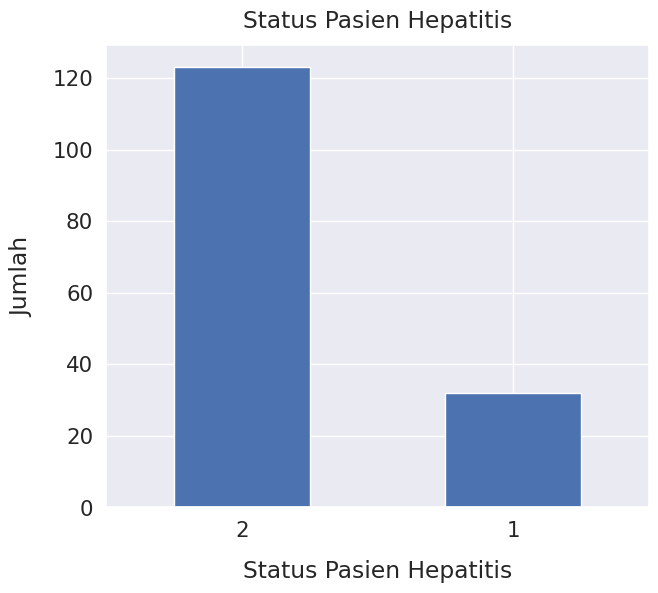

In [12]:
sns.set(font_scale=1.4)
dataset['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status Pasien Hepatitis", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Pasien Hepatitis", y=1.02);

## Cek Distribusi Age

In [13]:
print(dataset['Age'].value_counts())

Age
30    8
34    8
38    8
36    7
51    6
39    6
50    6
42    5
54    5
45    5
44    5
28    5
37    5
32    4
47    4
27    4
31    4
23    4
41    3
56    3
33    3
52    3
20    3
40    3
61    3
25    3
49    3
35    2
22    2
48    2
57    2
24    2
58    2
62    2
78    1
53    1
46    1
70    1
72    1
69    1
7     1
65    1
64    1
60    1
59    1
67    1
26    1
66    1
43    1
Name: count, dtype: int64


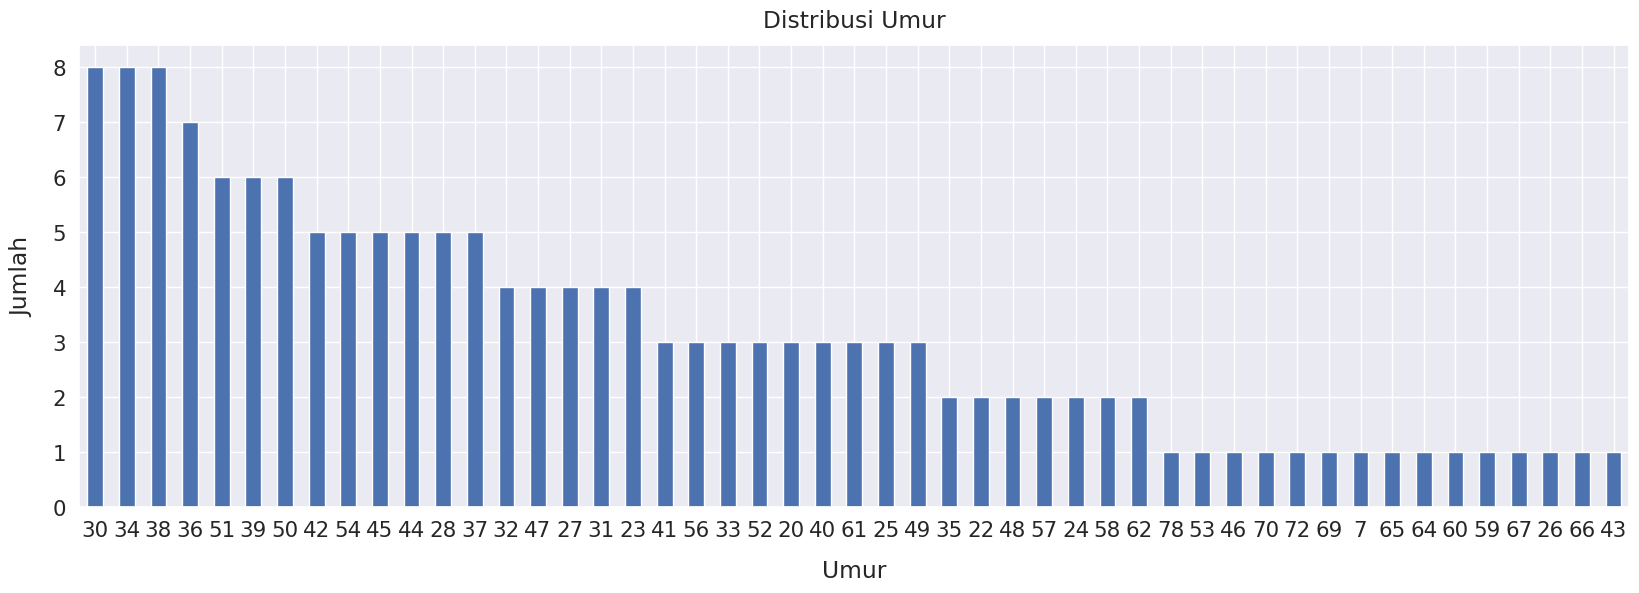

In [ ]:
sns.set(font_scale=1.4)
dataset['Age'].value_counts().plot(kind='bar', figsize=(20, 6), rot=0)
plt.xlabel("Umur", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Distribusi Umur", y=1.02);

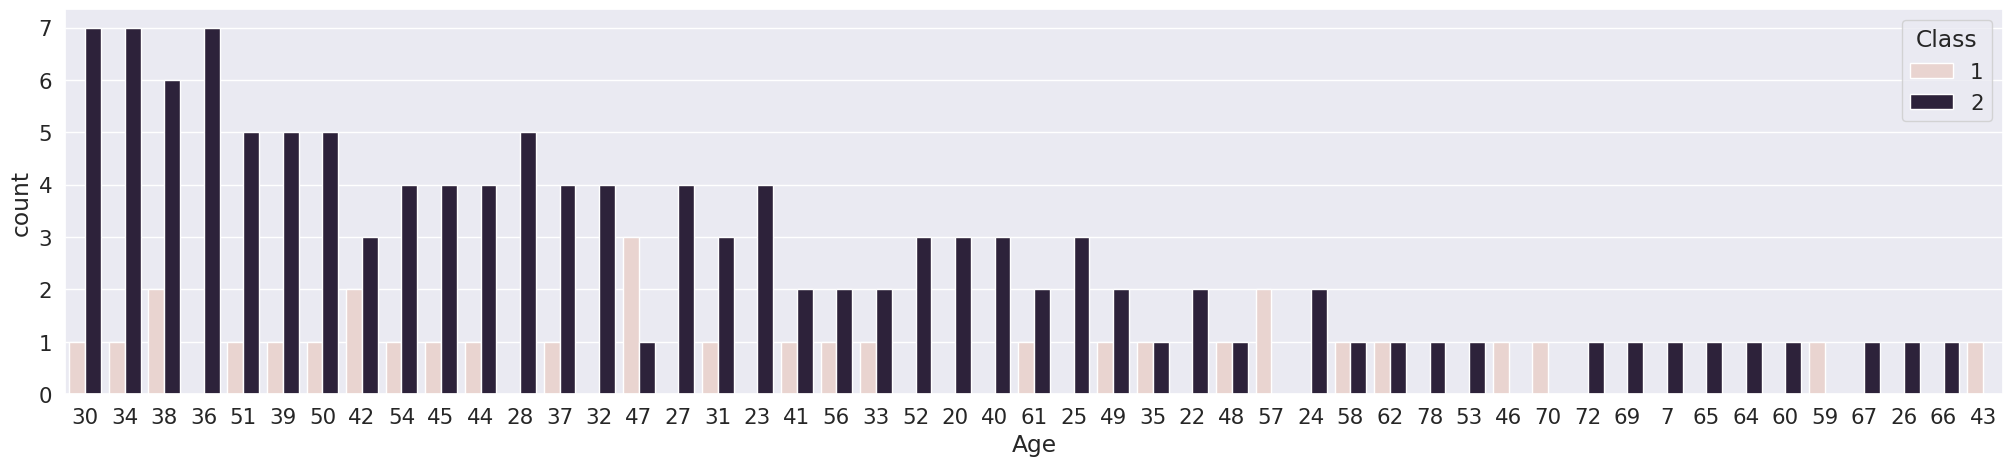

In [ ]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Age'],order=dataset['Age'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Sex

Sex
1    139
2     16
Name: count, dtype: int64


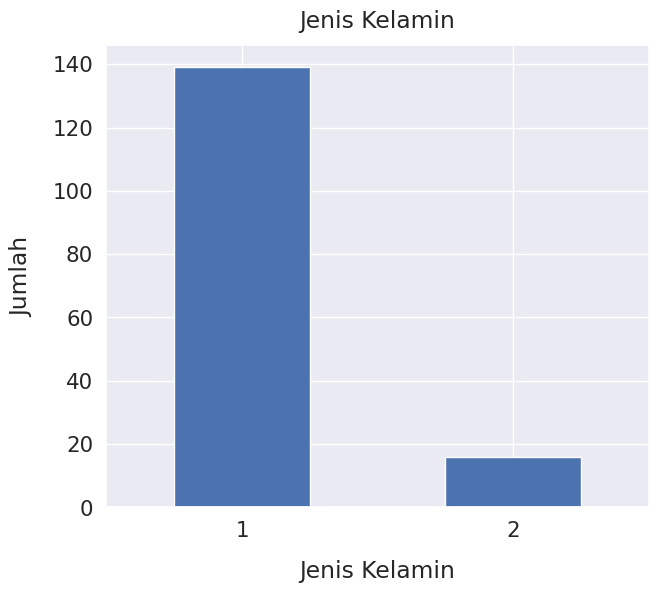

In [ ]:
print(dataset['Sex'].value_counts())
sns.set(font_scale=1.4)
dataset['Sex'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Jenis Kelamin", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Jenis Kelamin", y=1.02);

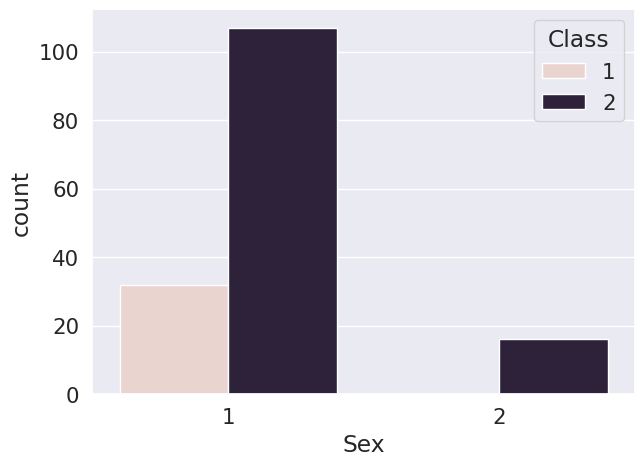

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Sex'],order=dataset['Sex'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Steroid


Steroid
2    78
1    76
?     1
Name: count, dtype: int64


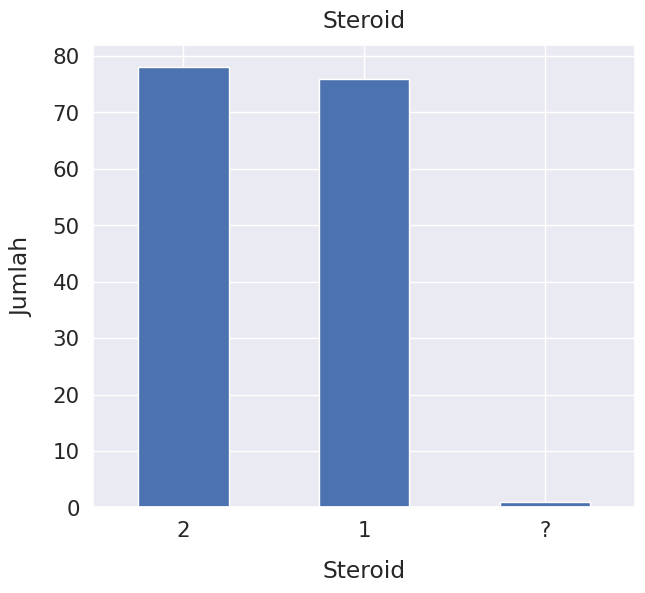

In [ ]:
print(dataset['Steroid'].value_counts())
sns.set(font_scale=1.4)
dataset['Steroid'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Steroid", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Steroid", y=1.02);

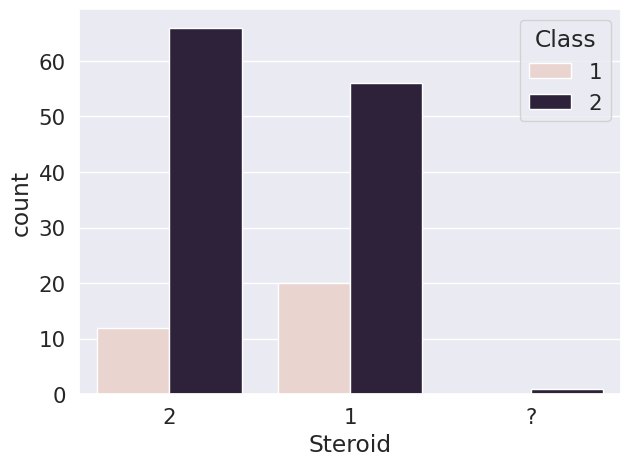

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Steroid'],order=dataset['Steroid'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Antivirals

Antivirals
2    131
1     24
Name: count, dtype: int64


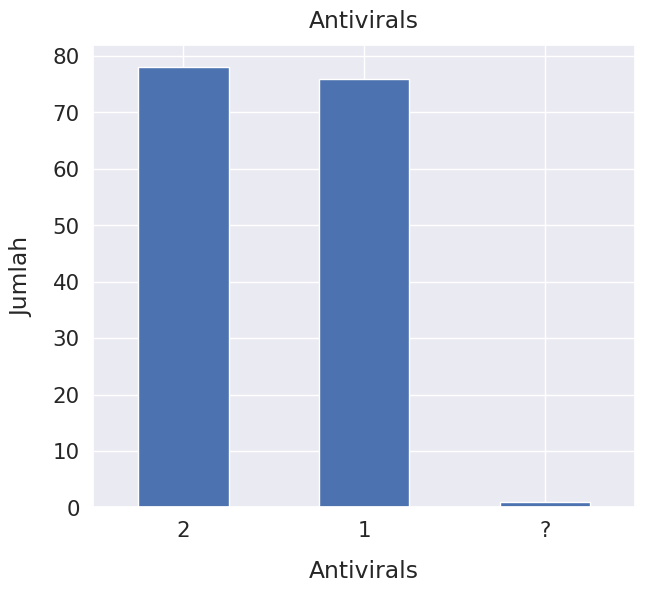

In [ ]:
print(dataset['Antivirals'].value_counts())
sns.set(font_scale=1.4)
dataset['Steroid'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Antivirals", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Antivirals", y=1.02);

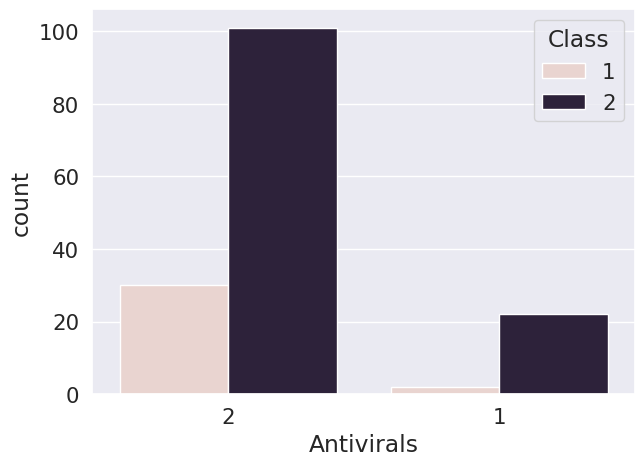

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Antivirals'],order=dataset['Antivirals'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Fatigue


In [ ]:
print(dataset['Fatigue'].value_counts())
sns.set(font_scale=1.4)
dataset['Fatigue'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Fatigue", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Fatigue", y=1.02);

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Fatigue'],order=dataset['Fatigue'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Malaise

In [ ]:
print(dataset['Malaise'].value_counts())
sns.set(font_scale=1.4)
dataset['Malaise'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Malaise", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Malaise", y=1.02);

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Malaise'],order=dataset['Malaise'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Anorexia

In [ ]:
print(dataset['Anorexia'].value_counts())
sns.set(font_scale=1.4)
dataset['Anorexia'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Anorexia", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Anorexia", y=1.02);

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Anorexia'],order=dataset['Anorexia'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Liver Big


In [ ]:
print(dataset['Liver Big'].value_counts())
sns.set(font_scale=1.4)
dataset['Liver Big'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Liver Big", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Liver Big", y=1.02);

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Liver Big'],order=dataset['Liver Big'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Liver Firm

In [ ]:
print(dataset['Liver Firm'].value_counts())
sns.set(font_scale=1.4)
dataset['Liver Firm'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Liver Firm", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Liver Firm", y=1.02);

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Liver Firm'],order=dataset['Liver Firm'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Spleen Palpable

In [ ]:
print(dataset['Spleen Palpable'].value_counts())
sns.set(font_scale=1.4)
dataset['Spleen Palpable'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Spleen Palpable", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Spleen Palpable", y=1.02);

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Spleen Palpable'],order=dataset['Spleen Palpable'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Spiders

In [ ]:
print(dataset['Spiders'].value_counts())
sns.set(font_scale=1.4)
dataset['Spiders'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Spiders", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Spiders", y=1.02);

In [ ]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Spiders'],order=dataset['Spiders'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Ascites

In [ ]:
print(dataset['Ascites'].value_counts())
sns.set(font_scale=1.4)
dataset['Ascites'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Ascites", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Ascites", y=1.02);

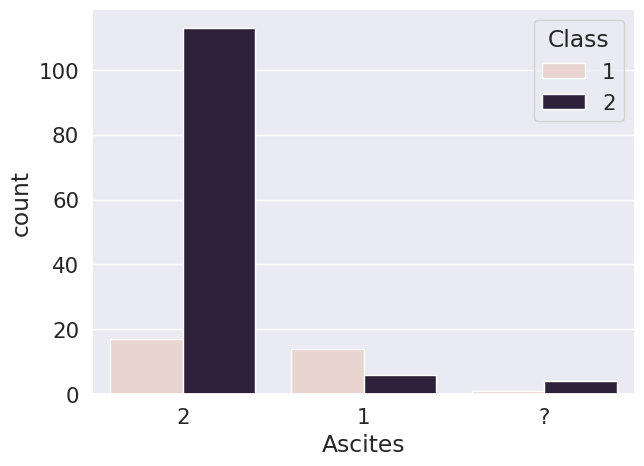

In [37]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Ascites'],order=dataset['Ascites'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Varices

Varices
2    132
1     18
?      5
Name: count, dtype: int64


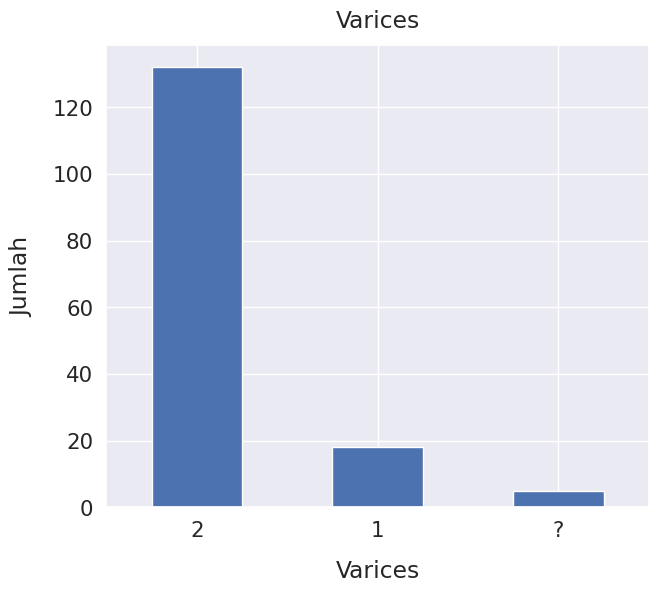

In [38]:
print(dataset['Varices'].value_counts())
sns.set(font_scale=1.4)
dataset['Varices'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Varices", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Varices", y=1.02);

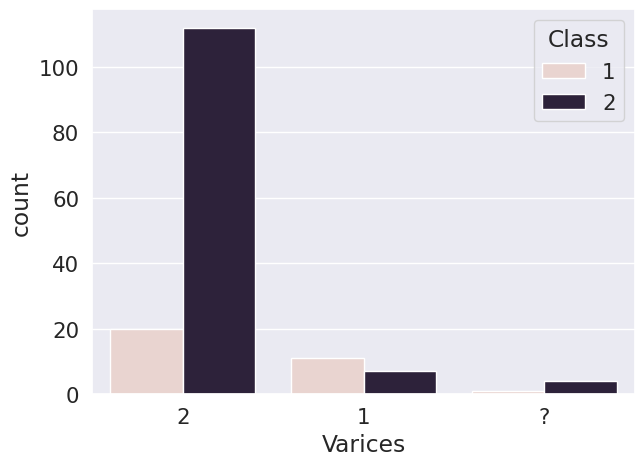

In [39]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Varices'],order=dataset['Varices'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Bilirubin

Bilirubin
1.00    29
0.70    23
0.90    13
0.60    10
0.80    10
1.20     8
1.50     7
?        6
1.30     6
4.60     4
2.00     4
1.60     3
2.30     3
1.70     3
0.50     2
1.40     2
0.40     2
2.80     2
3.20     2
1.90     1
3.90     1
8.00     1
4.20     1
2.90     1
1.10     1
3.50     1
2.40     1
4.80     1
3.00     1
2.50     1
4.10     1
1.80     1
0.30     1
2.20     1
7.60     1
Name: count, dtype: int64


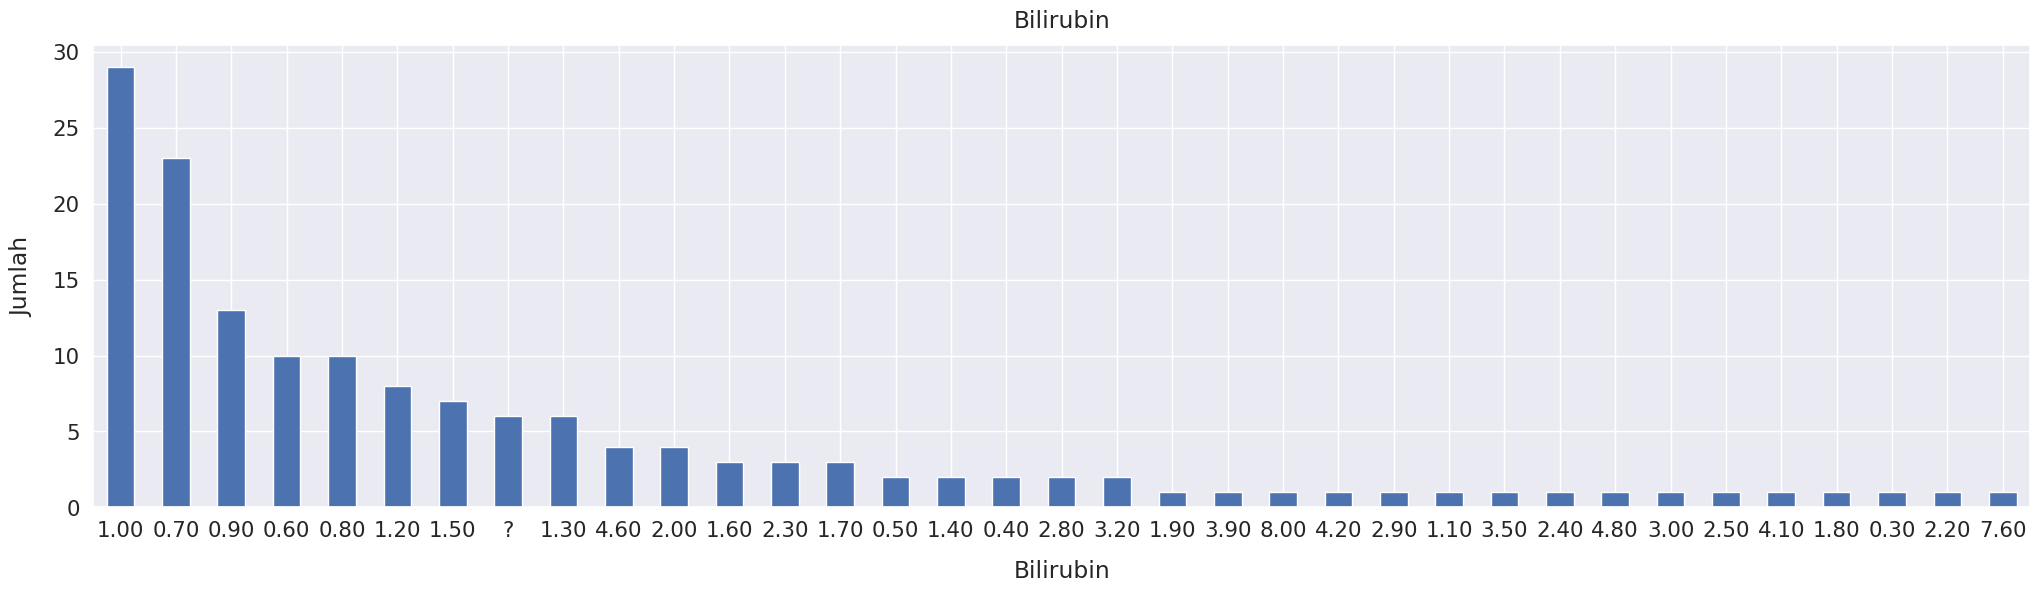

In [40]:
print(dataset['Bilirubin'].value_counts())
sns.set(font_scale=1.4)
dataset['Bilirubin'].value_counts().plot(kind='bar', figsize=(25, 6), rot=0)
plt.xlabel("Bilirubin", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Bilirubin", y=1.02);

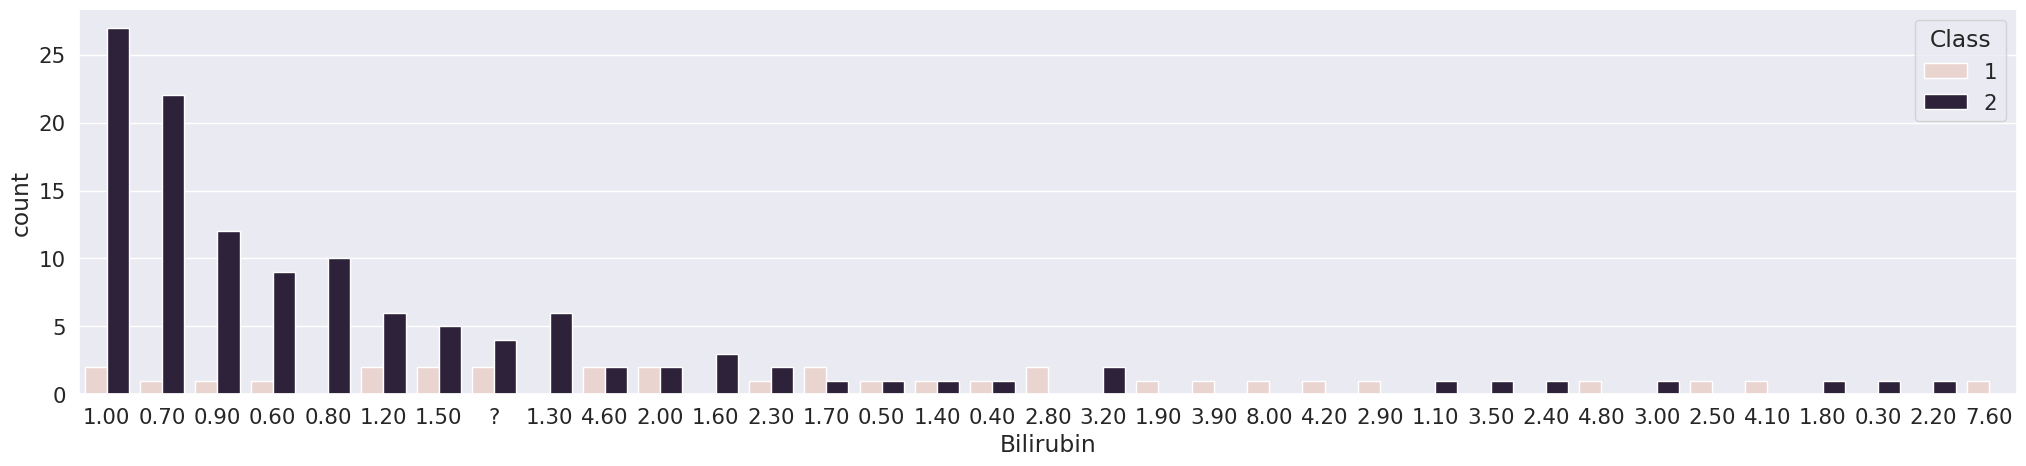

In [41]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Bilirubin'],order=dataset['Bilirubin'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Alk Phosphate

Alk Phosphate
?      29
85     18
81      4
62      4
100     3
       ..
103     1
34      1
127     1
55      1
126     1
Name: count, Length: 84, dtype: int64


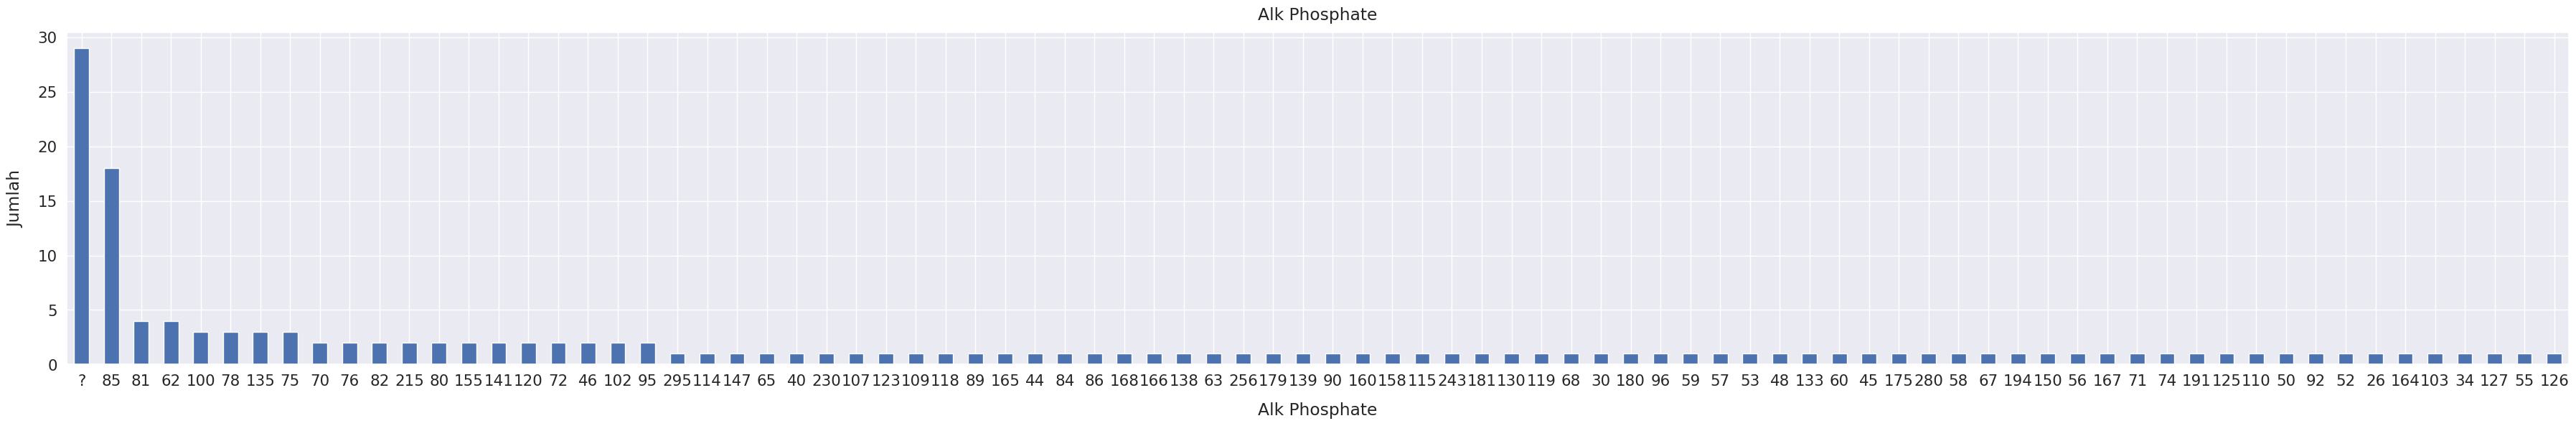

In [42]:
print(dataset['Alk Phosphate'].value_counts())
sns.set(font_scale=1.4)
dataset['Alk Phosphate'].value_counts().plot(kind='bar', figsize=(45, 6), rot=0)
plt.xlabel("Alk Phosphate", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Alk Phosphate", y=1.02);

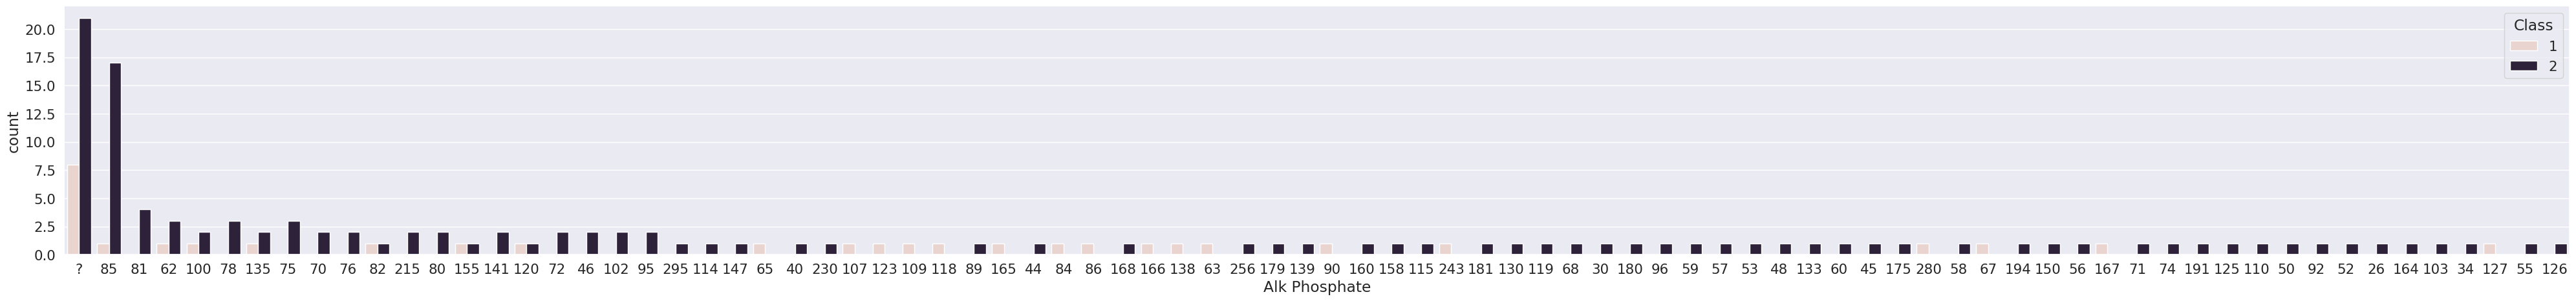

In [43]:
plt.subplots(figsize = (50,5))
sns.countplot(x=dataset['Alk Phosphate'],order=dataset['Alk Phosphate'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi SGOT

SGOT
20     7
60     6
28     5
55     5
30     5
      ..
110    1
90     1
123    1
117    1
156    1
Name: count, Length: 85, dtype: int64


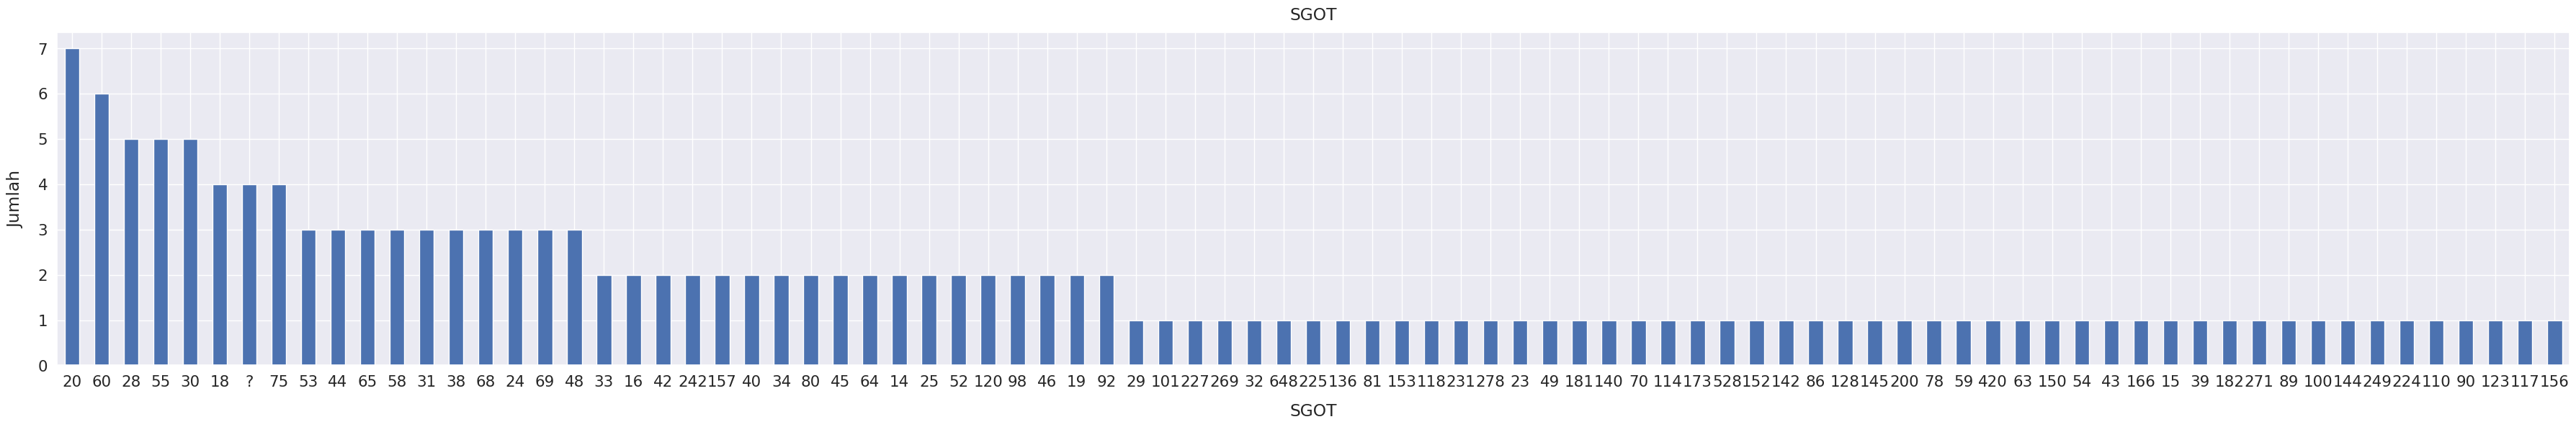

In [44]:
print(dataset['SGOT'].value_counts())
sns.set(font_scale=1.4)
dataset['SGOT'].value_counts().plot(kind='bar', figsize=(45, 6), rot=0)
plt.xlabel("SGOT", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("SGOT", y=1.02);

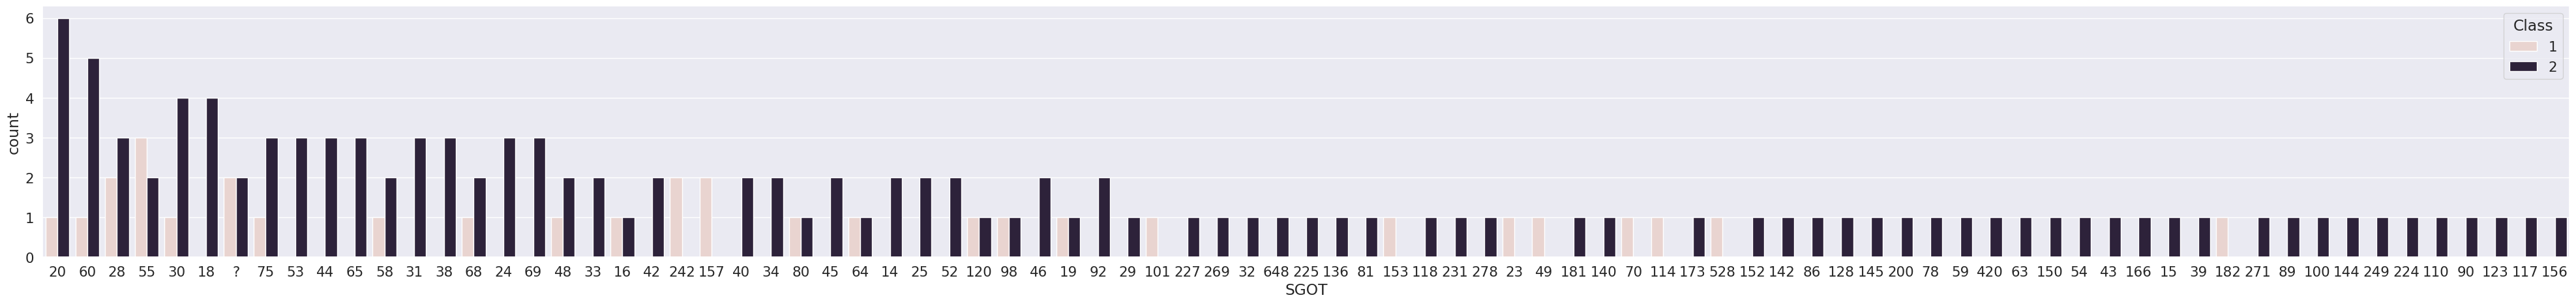

In [45]:
plt.subplots(figsize = (50,5))
sns.countplot(x=dataset['SGOT'],order=dataset['SGOT'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Albumin

Albumin
4.0    25
?      16
4.2    13
3.8     9
4.4     9
3.9     8
4.1     8
4.3     7
3.3     6
3.5     6
2.9     5
3.0     5
3.4     4
4.5     4
2.6     3
3.1     3
2.8     3
3.7     3
2.7     3
3.6     2
2.4     2
4.9     2
4.6     2
6.4     1
2.1     1
5.0     1
4.8     1
5.3     1
4.7     1
2.2     1
Name: count, dtype: int64


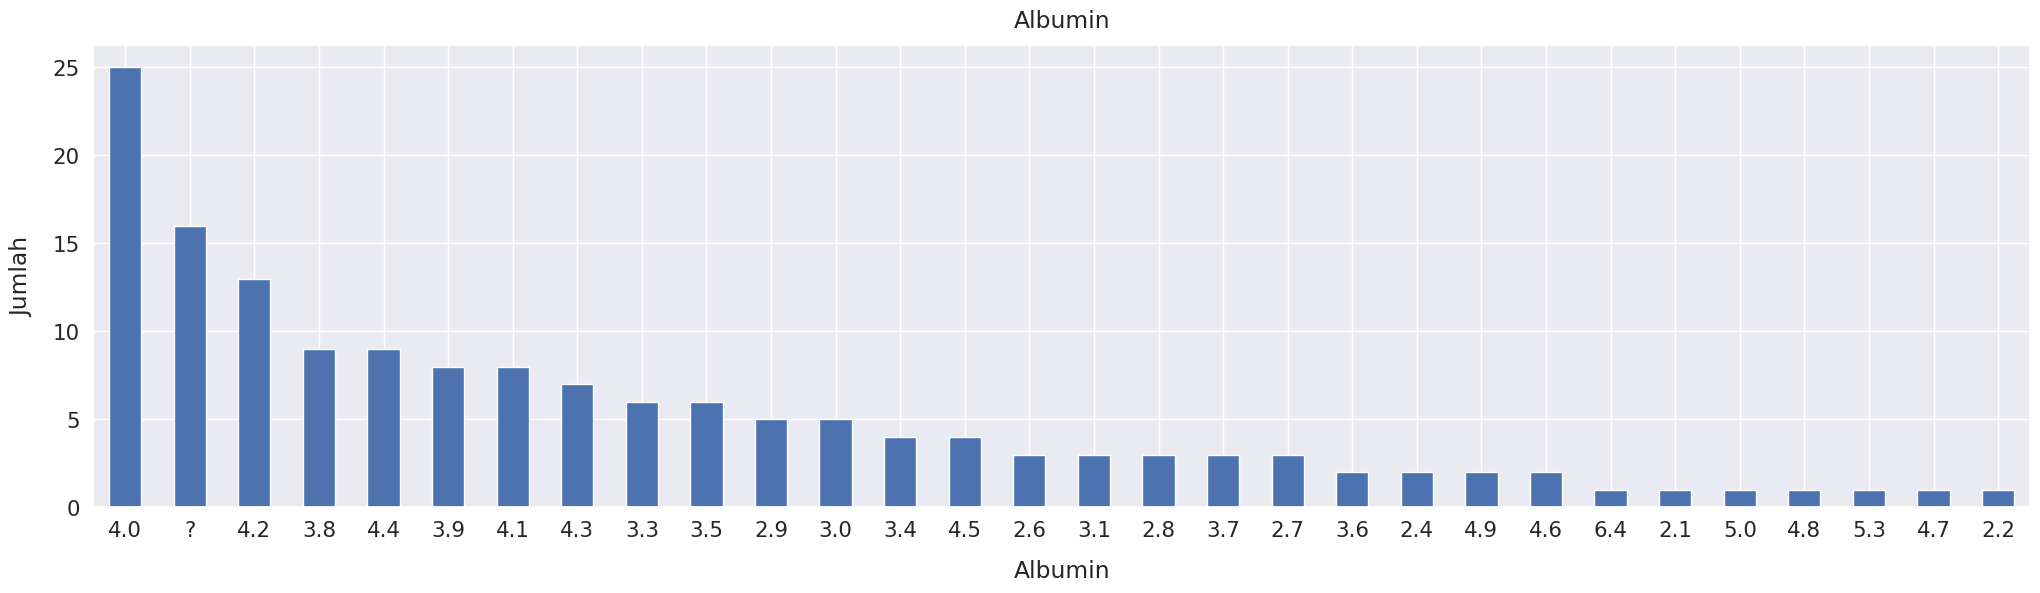

In [46]:
print(dataset['Albumin'].value_counts())
sns.set(font_scale=1.4)
dataset['Albumin'].value_counts().plot(kind='bar', figsize=(25, 6), rot=0)
plt.xlabel("Albumin", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Albumin", y=1.02);

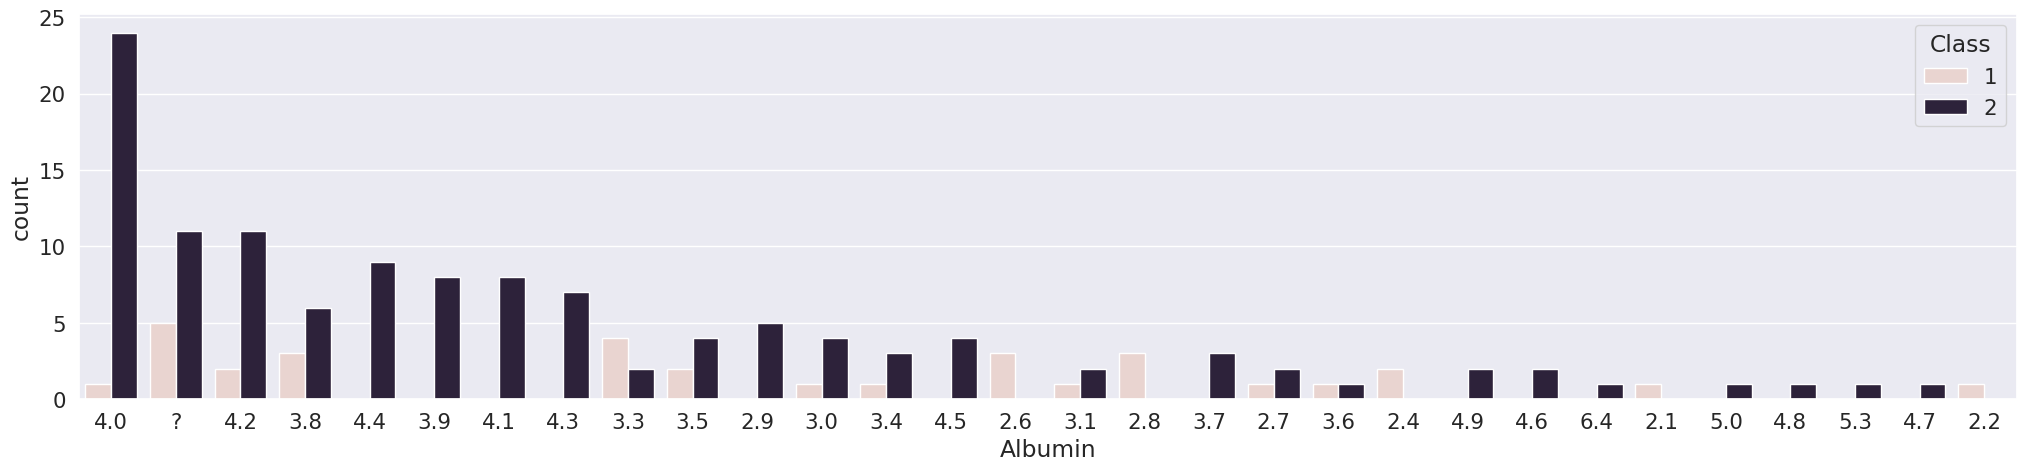

In [47]:
plt.subplots(figsize = (25,5))
sns.countplot(x=dataset['Albumin'],order=dataset['Albumin'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Protime

Protime
?      67
100    11
74      4
85      4
46      4
66      4
31      3
54      3
52      3
57      3
41      3
90      3
56      2
29      2
73      2
60      2
67      2
70      2
50      2
62      2
63      2
35      2
32      1
38      1
0       1
72      1
23      1
43      1
51      1
48      1
30      1
77      1
84      1
58      1
76      1
80      1
21      1
40      1
36      1
47      1
39      1
64      1
78      1
75      1
42      1
Name: count, dtype: int64


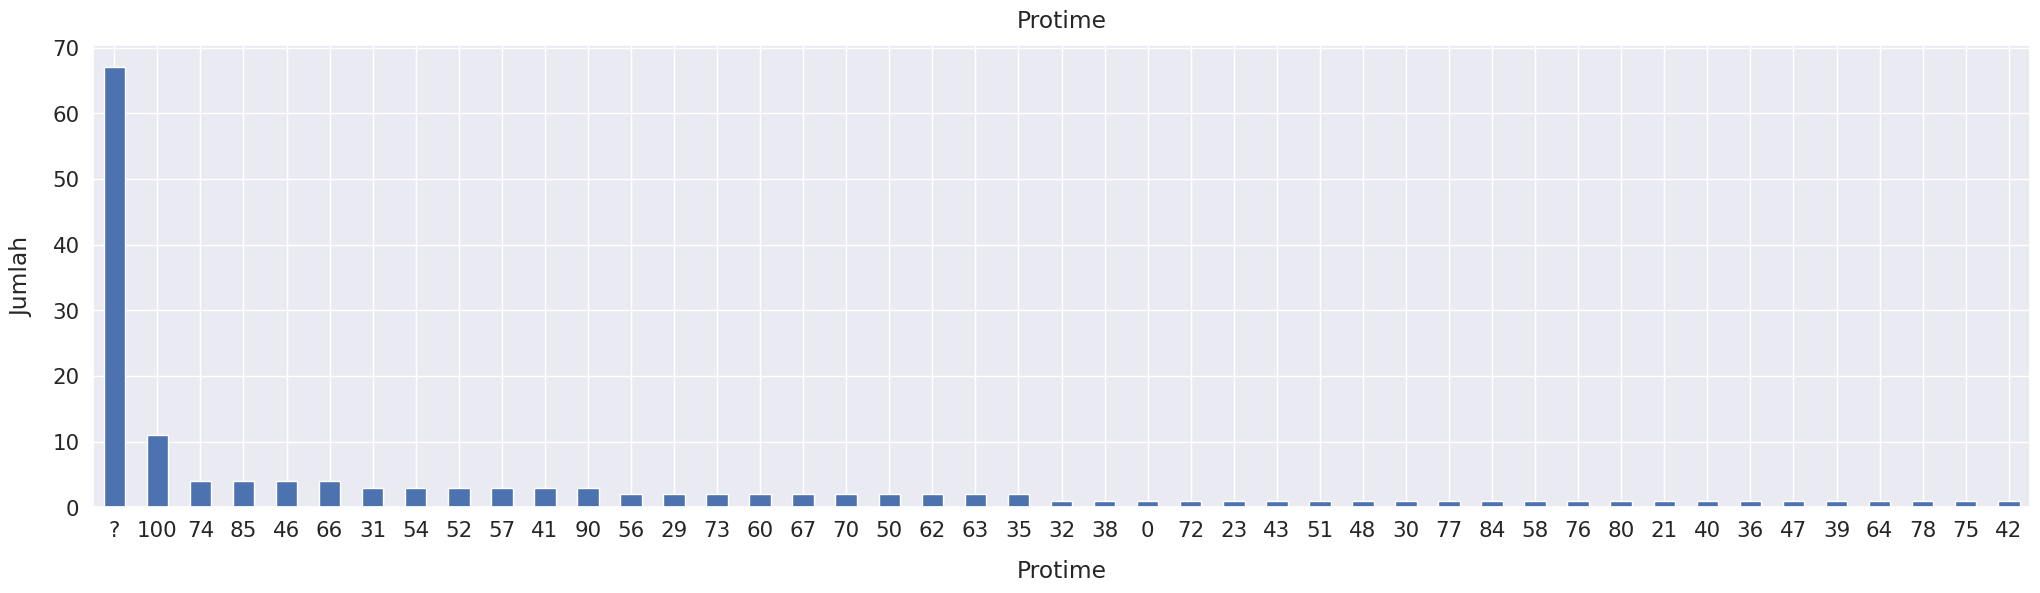

In [48]:
print(dataset['Protime'].value_counts())
sns.set(font_scale=1.4)
dataset['Protime'].value_counts().plot(kind='bar', figsize=(25, 6), rot=0)
plt.xlabel("Protime", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Protime", y=1.02);

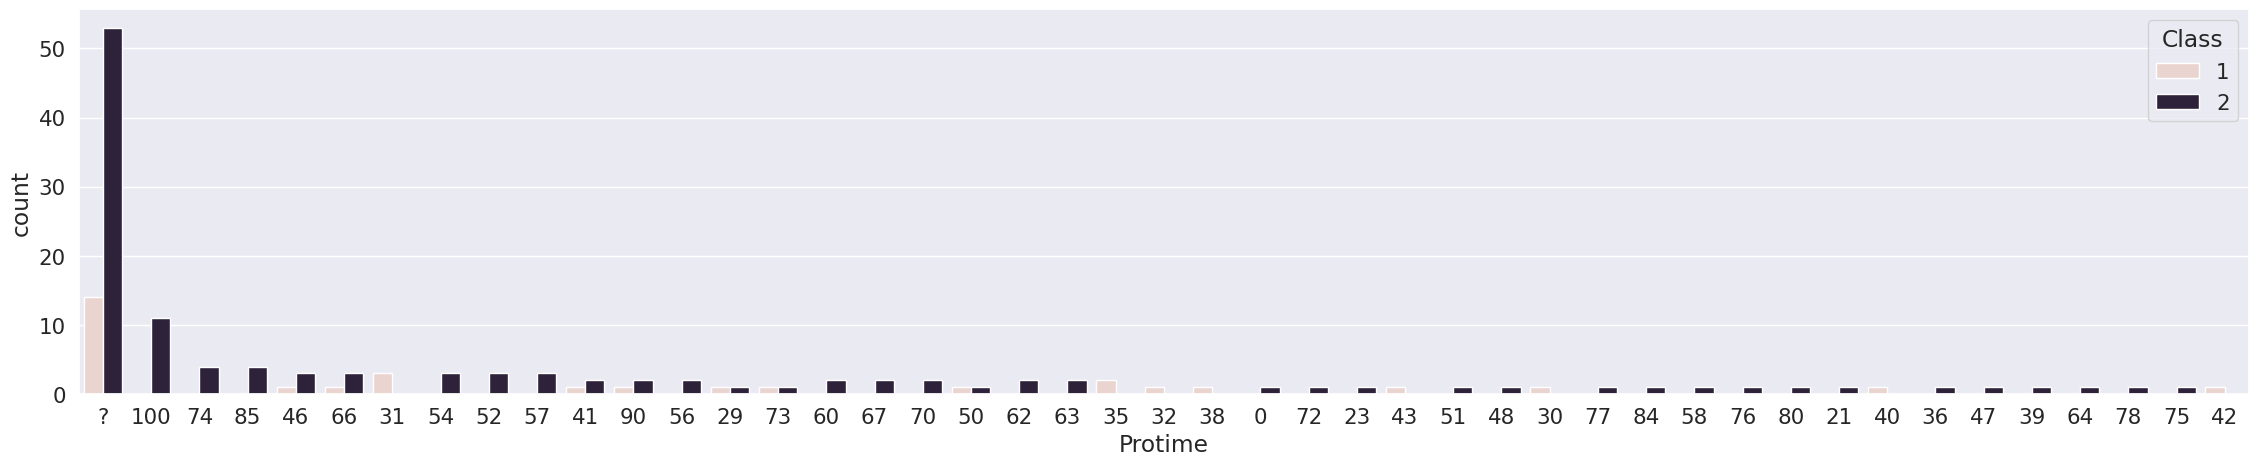

In [49]:
plt.subplots(figsize = (28,5))
sns.countplot(x=dataset['Protime'],order=dataset['Protime'].value_counts().index,hue=dataset['Class'])
plt.show()

### cek distribusi Histology

Histology
1    85
2    70
Name: count, dtype: int64


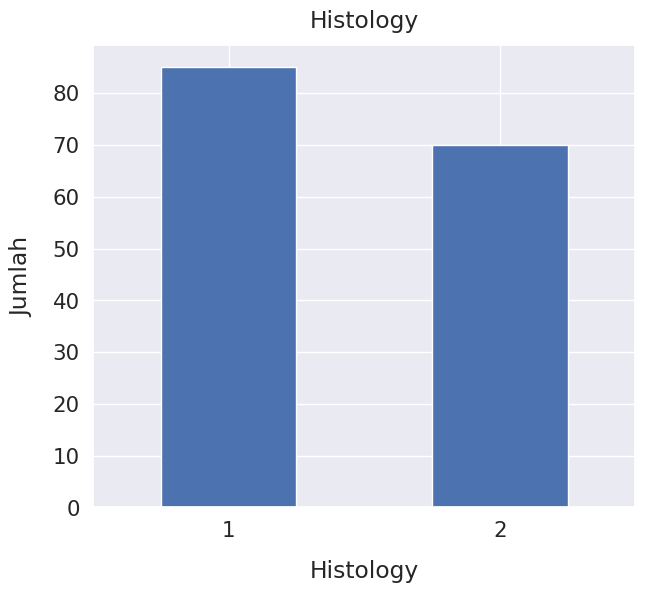

In [50]:
print(dataset['Histology'].value_counts())
sns.set(font_scale=1.4)
dataset['Histology'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Histology", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Histology", y=1.02);

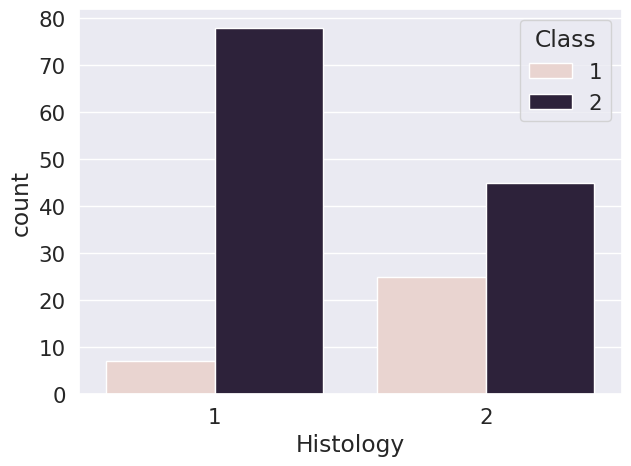

In [51]:
plt.subplots(figsize = (7,5))
sns.countplot(x=dataset['Histology'],order=dataset['Histology'].value_counts().index,hue=dataset['Class'])
plt.show()

**temuan:** ada beberapa fitur yang bernilai `?`, maka dapat kita katakan, bahwa `?` merupakan penanda nilai yang hilang

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

**temuan**:
- Penilaian kualitas data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- Penilaian tingkat kecukupan data sesuai dengan tujuan teknis data science, dengan sajian sebagaimana hasil analisis karakteristik data
- ada beberapa fitur yang nilainya hilang, harus digunakan tahapan **`memperbaiki nilai yang hilang`**
- distribusi class **`imbalanced`**, disini asesi **tidak melakukan proses perbaikan imbalanced learning**

## BAB 4 – (J.62DMI00.007.1) menentukan object data
silakan generate table menggunakan https://www.tablesgenerator.com/markdown_tables

**temuan**:

|Nama             | Deskripsi|
|-----------------|---------|
| **CLASS**       | **Label**   |
| AGE             | Atribut |
| SEX             | Atribut |
| STEROID         | Atribut |
| ANTIVIRALS      | Atribut |
| FATIGUE         | Atribut |
| MALAISE         | Atribut |
| ANOREXIA        | Atribut |
| LIVER BIG       | Atribut |
| LIVER FIRM      | Atribut |
| SPLEEN PALPABLE | Atribut |
| SPIDERS         | Atribut |
| ASCITES         | Atribut |
| VARICES         | Atribut |
| BILIRUBIN       | Atribut |
| ALK PHOSPHATE   | Atribut |
| SGOT            | Atribut |
| ALBUMIN         | Atribut |
| PROTIME         | Atribut |
| HISTOLOGY       | Atribut |

## BAB 5 – (J.62DMI00.008.1) membersihkan data

### Memperbaiki nilai yang hilang

nilai yang hilang, ditulis dalam bentuk ?, maka kita rubah menjadi NaN

In [52]:
dataset.replace("?", np.nan, inplace= True)

### cek bentuk dataset

In [53]:
dataset.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [54]:
dataset.tail()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


### tahap memperbaiki nilai yang hilang


In [55]:
dataset.isnull().values.any()

True

In [56]:
dataset.loc[:, dataset.isnull().any()].columns

Index(['Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm',
       'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin',
       'Alk Phosphate', 'SGOT', 'Albumin', 'Protime'],
      dtype='object')

In [57]:
dataset.loc[:,list(dataset.loc[:,dataset.isnull().any()].columns)].isnull().sum()/(len(dataset))*100

Steroid             0.645161
Fatigue             0.645161
Malaise             0.645161
Anorexia            0.645161
Liver Big           6.451613
Liver Firm          7.096774
Spleen Palpable     3.225806
Spiders             3.225806
Ascites             3.225806
Varices             3.225806
Bilirubin           3.870968
Alk Phosphate      18.709677
SGOT                2.580645
Albumin            10.322581
Protime            43.225806
dtype: float64

**temuan**: untuk Protime, nilai yang hilang 43%, karena masih dibawah 50%, maka asesi memutuskan untuk memperbaiki bukan menghapus fitur tersebut.

<Axes: >

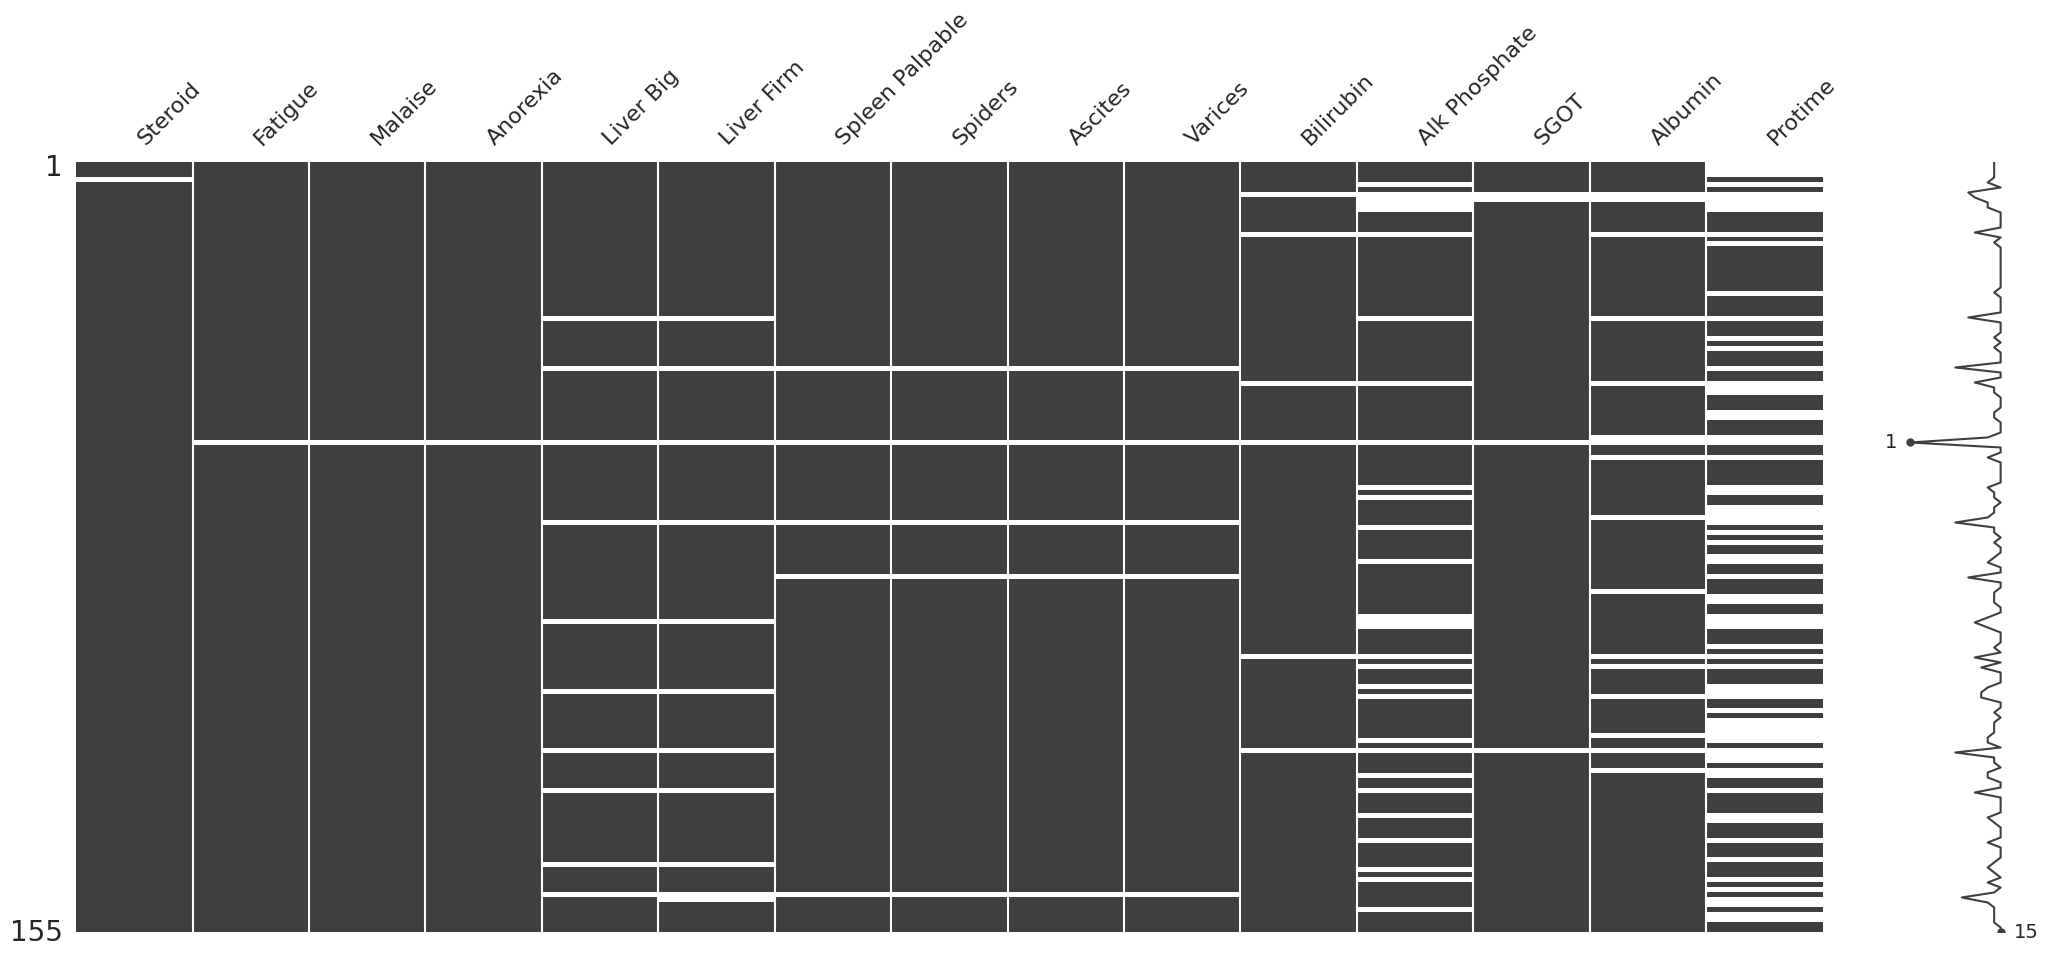

In [58]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [59]:
# hapus fitur jika fitur yang hilang lebih dari 50%
# dataset.drop(['fitur'], axis="columns", inplace=True)

In [60]:
# Perbaiki Steroid
median_value=dataset['Steroid'].median()
dataset['Steroid']=dataset['Steroid'].fillna(median_value)

# Perbaiki Fatigue
median_value=dataset['Fatigue'].median()
dataset['Fatigue']=dataset['Fatigue'].fillna(median_value)

# Perbaiki Malaise
median_value=dataset['Malaise'].median()
dataset['Malaise']=dataset['Malaise'].fillna(median_value)

# Perbaiki Anorexia
median_value=dataset['Anorexia'].median()
dataset['Anorexia']=dataset['Anorexia'].fillna(median_value)

# Perbaiki Liver Big
median_value=dataset['Liver Big'].median()
dataset['Liver Big']=dataset['Liver Big'].fillna(median_value)

# Perbaiki Liver Firm
median_value=dataset['Liver Firm'].median()
dataset['Liver Firm']=dataset['Liver Firm'].fillna(median_value)

# Perbaiki Spleen Palpable
median_value=dataset['Spleen Palpable'].median()
dataset['Spleen Palpable']=dataset['Spleen Palpable'].fillna(median_value)

# Perbaiki Spiders
median_value=dataset['Spiders'].median()
dataset['Spiders']=dataset['Spiders'].fillna(median_value)

# Perbaiki Ascites
median_value=dataset['Ascites'].median()
dataset['Ascites']=dataset['Ascites'].fillna(median_value)

# Perbaiki Varices
median_value=dataset['Varices'].median()
dataset['Varices']=dataset['Varices'].fillna(median_value)

# Perbaiki Bilirubin
median_value=dataset['Bilirubin'].median()
dataset['Bilirubin']=dataset['Bilirubin'].fillna(median_value)

# Perbaiki Alk Phosphate
median_value=dataset['Alk Phosphate'].median()
dataset['Alk Phosphate']=dataset['Alk Phosphate'].fillna(median_value)

# Perbaiki SGOT
median_value=dataset['SGOT'].median()
dataset['SGOT']=dataset['SGOT'].fillna(median_value)

# Perbaiki Albumin
median_value=dataset['Albumin'].median()
dataset['Albumin']=dataset['Albumin'].fillna(median_value)

# Perbaiki Protime
median_value=dataset['Protime'].median()
dataset['Protime']=dataset['Protime'].fillna(median_value)

cek kembali

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   Age              155 non-null    int64 
 2   Sex              155 non-null    int64 
 3   Steroid          155 non-null    object
 4   Antivirals       155 non-null    int64 
 5   Fatigue          155 non-null    object
 6   Malaise          155 non-null    object
 7   Anorexia         155 non-null    object
 8   Liver Big        155 non-null    object
 9   Liver Firm       155 non-null    object
 10  Spleen Palpable  155 non-null    object
 11  Spiders          155 non-null    object
 12  Ascites          155 non-null    object
 13  Varices          155 non-null    object
 14  Bilirubin        155 non-null    object
 15  Alk Phosphate    155 non-null    object
 16  SGOT             155 non-null    object
 17  Albumin          155 non-null    ob

**temuan**: meski sudah diperbaiki, namun tipe data masih Object, maka perlu dirubah menjadi int atau Float. untuk menentukan tersebut, perlu dilihat kembali distribusi data

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data

In [62]:
dataset['Steroid'] = dataset['Steroid'].astype(str).astype(float)
dataset['Fatigue'] = dataset['Fatigue'].astype(str).astype(float)
dataset['Malaise'] = dataset['Malaise'].astype(str).astype(float)
dataset['Anorexia'] = dataset['Anorexia'].astype(str).astype(float)
dataset['Liver Big'] = dataset['Liver Big'].astype(str).astype(float)
dataset['Liver Firm'] = dataset['Liver Firm'].astype(str).astype(float)
dataset['Spleen Palpable'] = dataset['Spleen Palpable'].astype(str).astype(float)
dataset['Spiders'] = dataset['Spiders'].astype(str).astype(float)
dataset['Ascites'] = dataset['Ascites'].astype(str).astype(float)
dataset['Varices'] = dataset['Varices'].astype(str).astype(float)
dataset['Bilirubin'] = dataset['Bilirubin'].astype(str).astype(float)
dataset['Alk Phosphate'] = dataset['Alk Phosphate'].astype(str).astype(float)
dataset['SGOT'] = dataset['SGOT'].astype(str).astype(float)
dataset['Albumin'] = dataset['Albumin'].astype(str).astype(float)
dataset['Protime'] = dataset['Protime'].astype(str).astype(float)

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    float64
 6   Malaise          155 non-null    float64
 7   Anorexia         155 non-null    float64
 8   Liver Big        155 non-null    float64
 9   Liver Firm       155 non-null    float64
 10  Spleen Palpable  155 non-null    float64
 11  Spiders          155 non-null    float64
 12  Ascites          155 non-null    float64
 13  Varices          155 non-null    float64
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    float64
 16  SGOT             155 non-null    float64
 17  Albumin         

In [64]:
dataset.describe()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.509677,1.845161,1.348387,1.606452,1.793548,1.838710,1.612903,1.806452,1.670968,1.870968,1.883871,1.410968,101.522581,85.174194,3.836129,61.483871,1.451613
std,0.406070,12.565878,0.305240,0.501527,0.362923,0.478004,0.490120,0.406070,0.368991,0.488665,0.396360,0.471385,0.336322,0.321418,1.191178,47.082042,88.590122,0.619267,17.198745,0.499266
min,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.800000,78.000000,32.500000,3.500000,57.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,85.000000,58.000000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


### menghapus nilai yang bernilai konstan

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    float64
 6   Malaise          155 non-null    float64
 7   Anorexia         155 non-null    float64
 8   Liver Big        155 non-null    float64
 9   Liver Firm       155 non-null    float64
 10  Spleen Palpable  155 non-null    float64
 11  Spiders          155 non-null    float64
 12  Ascites          155 non-null    float64
 13  Varices          155 non-null    float64
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    float64
 16  SGOT             155 non-null    float64
 17  Albumin         

In [66]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    float64
 6   Malaise          155 non-null    float64
 7   Anorexia         155 non-null    float64
 8   Liver Big        155 non-null    float64
 9   Liver Firm       155 non-null    float64
 10  Spleen Palpable  155 non-null    float64
 11  Spiders          155 non-null    float64
 12  Ascites          155 non-null    float64
 13  Varices          155 non-null    float64
 14  Bilirubin        155 non-null    float64
 15  Alk Phosphate    155 non-null    float64
 16  SGOT             155 non-null    float64
 17  Albumin         

## BAB 7 – (J.62DMI00.010.1) menentukan label data

In [68]:
y = dataset['Class']

In [69]:
y

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: Class, Length: 155, dtype: int64

In [70]:
X = dataset.drop(columns=['Class'])

In [71]:
X

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver Big,Liver Firm,Spleen Palpable,Spiders,Ascites,Varices,Bilirubin,Alk Phosphate,SGOT,Albumin,Protime,Histology
0,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,3.3,50.0,2
151,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,61.0,2
152,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,61.0,2
153,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


### Perlakukan data original

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=42)

### Perlakuan data normal

In [73]:
X_norm = StandardScaler().fit_transform(X)

In [74]:
X_train_norm, X_test_norm, Y_train_norm, Y_test_norm = train_test_split(X_norm,y, test_size=0.1, random_state=42)

## BAB 8 – (J.62DMI00.013.1) membangun model

### menggunakan Decision Tree

In [75]:
parameters_dt = {
                "model__max_depth": np.arange(1,21),
                "model__min_samples_leaf": np.arange(1,30,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [76]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier())
                          ])

#### Pemodelan data original

In [77]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

In [ ]:
ori_classifier_dt.best_estimator_

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

#### Pemodelan data normal

In [ ]:
norm_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [ ]:
norm_classifier_dt.fit(X_train_norm,Y_train_norm.ravel())

In [ ]:
norm_classifier_dt.best_estimator_

In [ ]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,norm_classifier_dt.best_params_[param_name]))

## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan

### evaluasi data original

In [ ]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

In [ ]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### Evaluasi data normal

In [ ]:
norm_y_pred_dt_train = norm_classifier_dt.predict(X_train_norm)

norm_accuracy_dt_train = accuracy_score(Y_train_norm,norm_y_pred_dt_train)
print('Akurasi pada training set: ', norm_accuracy_dt_train)

norm_precision_dt_train = precision_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Precision pada training set: ', norm_precision_dt_train)

norm_recall_dt_train = recall_score(Y_train_norm,norm_y_pred_dt_train, average='micro')
print('Recall pada training set: ', norm_recall_dt_train)

norm_y_pred_dt_test = norm_classifier_dt.predict(X_test_norm)

norm_accuracy_dt_test = accuracy_score(Y_test_norm,norm_y_pred_dt_test)
print('Akurasi pada test set: ', norm_accuracy_dt_test)

norm_precision_dt_test = precision_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Precision pada test set: ', norm_precision_dt_test)

norm_recall_dt_test = recall_score(Y_test_norm,norm_y_pred_dt_test, average='micro')
print('Recall pada test set: ', norm_recall_dt_test)

In [ ]:
sns.heatmap(confusion_matrix(Y_test_norm,norm_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### pelaporan evaluasi

In [ ]:
models = [
          ('Machine Learning Data Original', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Normalisasi', norm_accuracy_dt_train, norm_accuracy_dt_test)
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

In [ ]:
models_comparison = [
                        ('Machine Learning Data Original', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Data Normalisasi', norm_accuracy_dt_test, norm_recall_dt_test, norm_precision_dt_test)
                    ]

In [ ]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

In [ ]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

### Hasil terbaik akan dilihat Tree nya (Studi Kasus Machine Learning data original)

In [ ]:
from sklearn import tree

In [ ]:
# feature_importances = ori_classifier_dt.best_estimator_.named_steps["model"].feature_importances_
# feature_importances

In [ ]:
def Analize_Feature(model,X_test):
    aux_dic = {'name':[],'coef':[]}
    pd.set_option('display.max_rows',len(X_test.columns))
    for name, importance in zip(X_test.columns,model.best_estimator_.named_steps["model"].feature_importances_):
        aux_dic['name'].append(name)
        aux_dic['coef'].append(importance)
        df_features_importance = pd.DataFrame(aux_dic)
    print(df_features_importance.sort_values(by='coef',ascending=False))
    return df_features_importance
Analize_Feature(ori_classifier_dt,X_test)

In [ ]:
# tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"])

In [ ]:
fn=["Age","Sex","Steroid","Antivirals","Fatigue","Malaise","Anorexia","Liver Big",
                 "Liver Firm","Spleen Palpable","Spiders","Ascites","Varices","Bilirubin","Alk Phosphate","SGOT","Albumin","Protime","Histology"]
cn=['Die', 'Live']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(ori_classifier_dt.best_estimator_.named_steps["model"],
               feature_names = fn,
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

cara baca:
Jika Bilirubin <=2.45 maka ke node kiri (protime), selain itu ke kanan.